# Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

logreg = LogisticRegression()
logreg_corr = LogisticRegression()
logreg_rank = LogisticRegression()
logreg_ig = LogisticRegression()

%matplotlib inline 

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/نسخة من train_data.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data['capital-total'] = data['capital-gain'] + (-1 * data['capital-loss'])
data = data.drop(['capital-gain', 'capital-loss'], axis=1)



# Data Preprocessing


**1-Data cleaning**

Duplicates

In [ ]:
data = data.drop_duplicates()

Missing Values

In [ ]:
print (data.isnull().sum())  

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
Income            0
capital-total     0
dtype: int64


In [ ]:
data=data.dropna()

In [ ]:
unique_values = {}
for column in data:
    unique_values[column] = data[column].unique()

print(unique_values)

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87]), 'workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object), 'fnlwgt': array([ 77516,  83311, 215646, ...,  34066,  84661, 257302]), 'education': array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object), 'education-num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8]), 'marital-status': array([' Never-married', ' Married-civ-spous

In [ ]:
workclass_mode = data['workclass'].mode()[0]
data['workclass'] = data['workclass'].replace(' ?', workclass_mode)


In [ ]:
occupation_mode = data['occupation'].mode()[0]
data['occupation'] = data['occupation'].replace(' ?', occupation_mode)

In [ ]:
native_country_mode = data['native-country'].mode()[0]
data['native-country'] = data['native-country'].replace(' ?', native_country_mode)

Outliers

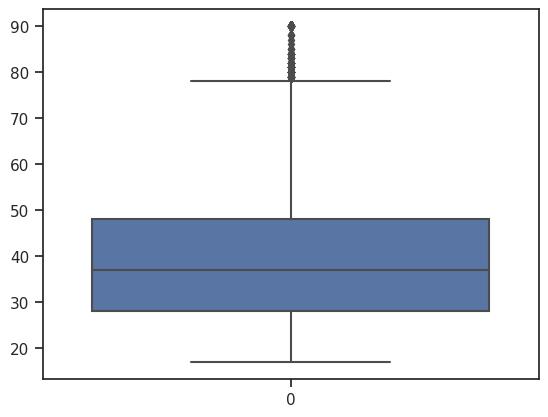

Number of outliers in 'age' feature: 142


In [ ]:

sns.set(style="ticks", color_codes=True)
sns.boxplot(data['age'])
plt.show()

q1, q3 = np.percentile(data['age'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
num_outliers = len(data[(data['age'] < lower_bound) | (data['age'] > upper_bound)])
print("Number of outliers in 'age' feature:", num_outliers)

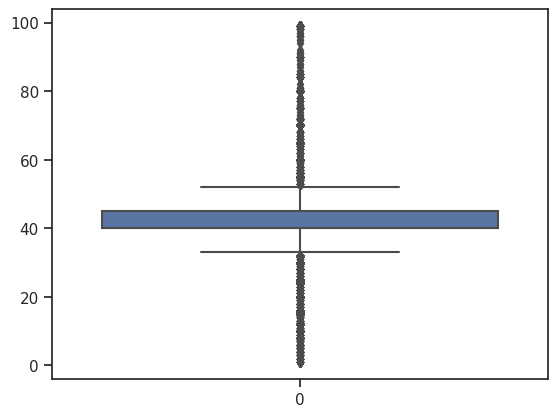

Number of outliers in 'hours-per-week' feature: 9002


In [ ]:
sns.set(style="ticks", color_codes=True)
sns.boxplot(data['hours-per-week'])
plt.show()

q1, q3 = np.percentile(data['hours-per-week'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
num_outliers = len(data[(data['hours-per-week'] < lower_bound) | (data['hours-per-week'] > upper_bound)])
print("Number of outliers in 'hours-per-week' feature:", num_outliers)

**2-Encoding categorical variables**

In [ ]:
# data['workclass']=data['workclass'].replace(" State-gov",0)
# data['workclass']=data['workclass'].replace(" Self-emp-not-inc",1)
# data['workclass']=data['workclass'].replace(" Private",2)
# data['workclass']=data['workclass'].replace(" Federal-gov",3)
# data['workclass']=data['workclass'].replace(" Local-gov",4)
# data['workclass']=data['workclass'].replace(" Self-emp-inc",5)
# data['workclass']=data['workclass'].replace(" Without-pay",6)
# data['workclass']=data['workclass'].replace(" Never-worked",7)

In [ ]:
data['education'] = data['education'].replace(' Preschool', 0)
data['education'] = data['education'].replace(' 1st-4th', 1)
data['education'] = data['education'].replace(' 5th-6th', 2)
data['education'] = data['education'].replace(' 7th-8th', 3)
data['education'] = data['education'].replace(' 9th', 4)
data['education'] = data['education'].replace(' 10th', 5)
data['education'] = data['education'].replace(' 11th', 6)   
data['education'] = data['education'].replace(' 12th', 7)
data['education'] = data['education'].replace(' HS-grad', 8)
data['education'] = data['education'].replace(' Some-college', 9)
data['education'] = data['education'].replace(' Assoc-acdm', 10)
data['education'] = data['education'].replace(' Assoc-voc', 11)
data['education'] = data['education'].replace(' Bachelors', 12)
data['education'] = data['education'].replace(' Masters', 13)
data['education'] = data['education'].replace(' Prof-school', 14)
data['education'] = data['education'].replace(' Doctorate', 15)

In [ ]:
# data['marital-status']=data['marital-status'].replace(' Never-married',0)
# data['marital-status']=data['marital-status'].replace(' Married-civ-spouse',1)
# data['marital-status']=data['marital-status'].replace(' Divorced',2)
# data['marital-status']=data['marital-status'].replace(' Married-spouse-absent',3)
# data['marital-status']=data['marital-status'].replace(' Separated',4)
# data['marital-status']=data['marital-status'].replace(' Married-AF-spouse',5)
# data['marital-status']=data['marital-status'].replace(' Widowed',6)

In [ ]:
# data['occupation'] = data['occupation'].replace(' Adm-clerical', 0)
# data['occupation'] = data['occupation'].replace(' Exec-managerial', 1)
# data['occupation'] = data['occupation'].replace(' Handlers-cleaners', 2)
# data['occupation'] = data['occupation'].replace(' Prof-specialty', 3)
# data['occupation'] = data['occupation'].replace(' Other-service', 4)
# data['occupation'] = data['occupation'].replace(' Sales', 5)
# data['occupation'] = data['occupation'].replace(' Craft-repair', 6)
# data['occupation'] = data['occupation'].replace(' Transport-moving', 7)
# data['occupation'] = data['occupation'].replace(' Farming-fishing', 8)
# data['occupation'] = data['occupation'].replace(' Machine-op-inspct', 9)
# data['occupation'] = data['occupation'].replace(' Tech-support', 10)
# data['occupation'] = data['occupation'].replace(' Protective-serv', 11)
# data['occupation'] = data['occupation'].replace(' Armed-Forces', 12)
# data['occupation'] = data['occupation'].replace(' Priv-house-serv', 13)

In [ ]:
# data['relationship'] = data['relationship'].replace(' Not-in-family', 0)
# data['relationship'] = data['relationship'].replace(' Husband', 1)
# data['relationship'] = data['relationship'].replace(' Wife', 2)
# data['relationship'] = data['relationship'].replace(' Own-child', 3)
# data['relationship'] = data['relationship'].replace(' Unmarried', 4)
# data['relationship'] = data['relationship'].replace(' Other-relative', 5)

In [ ]:
# data['race'] = data['race'].replace(' White', 0)
# data['race'] = data['race'].replace(' Black', 1)
# data['race'] = data['race'].replace(' Asian-Pac-Islander', 2)
# data['race'] = data['race'].replace(' Amer-Indian-Eskimo', 3)
# data['race'] = data['race'].replace(' Other', 4)

In [ ]:
# data['sex'] = data['sex'].replace(' Male', 0)
# data['sex'] = data['sex'].replace(' Female', 1)

In [ ]:
# data['native-country'] = data['native-country'].replace(' United-States', 0)
# data['native-country'] = data['native-country'].replace(' Cambodia', 1)
# data['native-country'] = data['native-country'].replace(' England', 2)
# data['native-country'] = data['native-country'].replace(' Puerto-Rico', 3)
# data['native-country'] = data['native-country'].replace(' Canada', 4)
# data['native-country'] = data['native-country'].replace(' Germany', 5)
# data['native-country'] = data['native-country'].replace(' Outlying-US(Guam-USVI-etc)', 6)
# data['native-country'] = data['native-country'].replace(' India', 7)
# data['native-country'] = data['native-country'].replace(' Japan', 8)
# data['native-country'] = data['native-country'].replace(' Greece', 9)
# data['native-country'] = data['native-country'].replace(' South', 10)
# data['native-country'] = data['native-country'].replace(' China', 11)
# data['native-country'] = data['native-country'].replace(' Cuba', 12)
# data['native-country'] = data['native-country'].replace(' Iran', 13)
# data['native-country'] = data['native-country'].replace(' Honduras', 14)
# data['native-country'] = data['native-country'].replace(' Philippines', 15)
# data['native-country'] = data['native-country'].replace(' Italy', 16)
# data['native-country'] = data['native-country'].replace(' Poland', 17)
# data['native-country'] = data['native-country'].replace(' Jamaica', 18)
# data['native-country'] = data['native-country'].replace(' Vietnam', 19)
# data['native-country'] = data['native-country'].replace(' Mexico', 20)
# data['native-country'] = data['native-country'].replace(' Portugal', 21)
# data['native-country'] = data['native-country'].replace(' Ireland', 22)
# data['native-country'] = data['native-country'].replace(' France', 23)
# data['native-country'] = data['native-country'].replace(' Dominican-Republic', 24)
# data['native-country'] = data['native-country'].replace(' Laos', 25)
# data['native-country'] = data['native-country'].replace(' Ecuador', 26)
# data['native-country'] = data['native-country'].replace(' Taiwan', 27)
# data['native-country'] = data['native-country'].replace(' Haiti', 28)
# data['native-country'] = data['native-country'].replace(' Columbia', 29)
# data['native-country'] = data['native-country'].replace(' Hungary', 30)
# data['native-country'] = data['native-country'].replace(' Guatemala', 31)
# data['native-country'] = data['native-country'].replace(' Nicaragua', 32)
# data['native-country'] = data['native-country'].replace(' Scotland', 33)
# data['native-country'] = data['native-country'].replace(' Thailand', 34)
# data['native-country'] = data['native-country'].replace(' Yugoslavia', 35)
# data['native-country'] = data['native-country'].replace(' El-Salvador', 36)
# data['native-country'] = data['native-country'].replace(' Trinadad&Tobago', 37)
# data['native-country'] = data['native-country'].replace(' Peru', 38)
# data['native-country'] = data['native-country'].replace(' Hong', 39)
# data['native-country'] = data['native-country'].replace(' Holand-Netherlands', 40)

In [ ]:
# data['Income '] = data['Income '].replace(' <=50K', 0)
# data['Income '] = data['Income '].replace(' >50K', 1)

In [ ]:
data = data.apply(LabelEncoder().fit_transform)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income,capital-total
0,22,6,2671,12,12,4,0,1,4,1,39,38,0,116
1,33,5,2926,12,12,2,3,0,4,1,12,38,0,91
2,21,3,14086,8,8,0,5,1,4,1,39,38,0,91
3,36,3,15336,6,6,2,5,0,2,1,39,38,0,91
4,11,3,19355,12,12,2,9,5,2,0,39,4,0,91


# Feature Selection


In [ ]:
corr_matrix = data.corr()
income_corr = corr_matrix['Income ']
income_related_features = income_corr.drop('Income ')
sorted_corr = income_related_features.sort_values(ascending=False)
print(sorted_corr)

education-num     0.335272
education         0.335141
capital-total     0.242804
age               0.234131
hours-per-week    0.232365
sex               0.215969
race              0.071847
occupation        0.034516
native-country    0.022853
workclass         0.002702
fnlwgt           -0.010605
marital-status   -0.199199
relationship     -0.250948
Name: Income , dtype: float64


In [ ]:
#from mlxtend.feature_selection import SequentialFeatureSelector


X = data.drop(columns=['Income '])
y = data['Income ']

# Create a logistic regression model
#lr = LogisticRegression()

# Forward stepwise selection
# sfs_forward = SequentialFeatureSelector(lr, k_features=5, forward=True, scoring='accuracy', cv=5)
# sfs_forward.fit(X, y)
# selected_features_forward = sfs_forward.k_feature_names_

# Backward stepwise selection
# sfs_backward = SequentialFeatureSelector(lr, k_features=5, forward=False, scoring='accuracy', cv=5)
# sfs_backward.fit(X, y)
# selected_features_backward = sfs_backward.k_feature_names_

In [ ]:
# print('Forward stepwise selection: ', selected_features_forward)
# print('Backward stepwise selection: ', selected_features_backward)


#education-num     0.323388
#age               0.229109
#hours-per-week    0.228966
#capital-total     0.212918
#workclass         0.097422
#marital-status    0.000763
#fnlwgt           -0.017083
#education        -0.049630
#native-country   -0.055517
#occupation       -0.055844
#race             -0.078403
#relationship     -0.167260
#sex              -0.206807

#'education-num'   'race'   'capital-total'

In [ ]:
from sklearn.feature_selection import RFE

feature_names = list(X.columns)
# Create an RFE object and fit it to the data
rfe = RFE(estimator=logreg, n_features_to_select=5, step=1)
rfe.fit(X, y)

# Get the ranked features with their corresponding names
ranked_features = [(rank, name) for rank, name in zip(rfe.ranking_, feature_names)]
ranked_features.sort()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print('Ranking of features:')
for rank, name in ranked_features:
    print(f'{rank}. {name}')

Ranking of features:
1. education
1. education-num
1. marital-status
1. relationship
1. sex
2. workclass
3. age
4. hours-per-week
5. occupation
6. native-country
7. race
8. capital-total
9. fnlwgt


In [ ]:
# Get the top 5 features
top_features = [name for rank, name in ranked_features if rank == 1]
data_rank = data[top_features + ['Income ']]

data_rank = data_rank.drop_duplicates()

print(top_features)

['education', 'education-num', 'marital-status', 'relationship', 'sex']


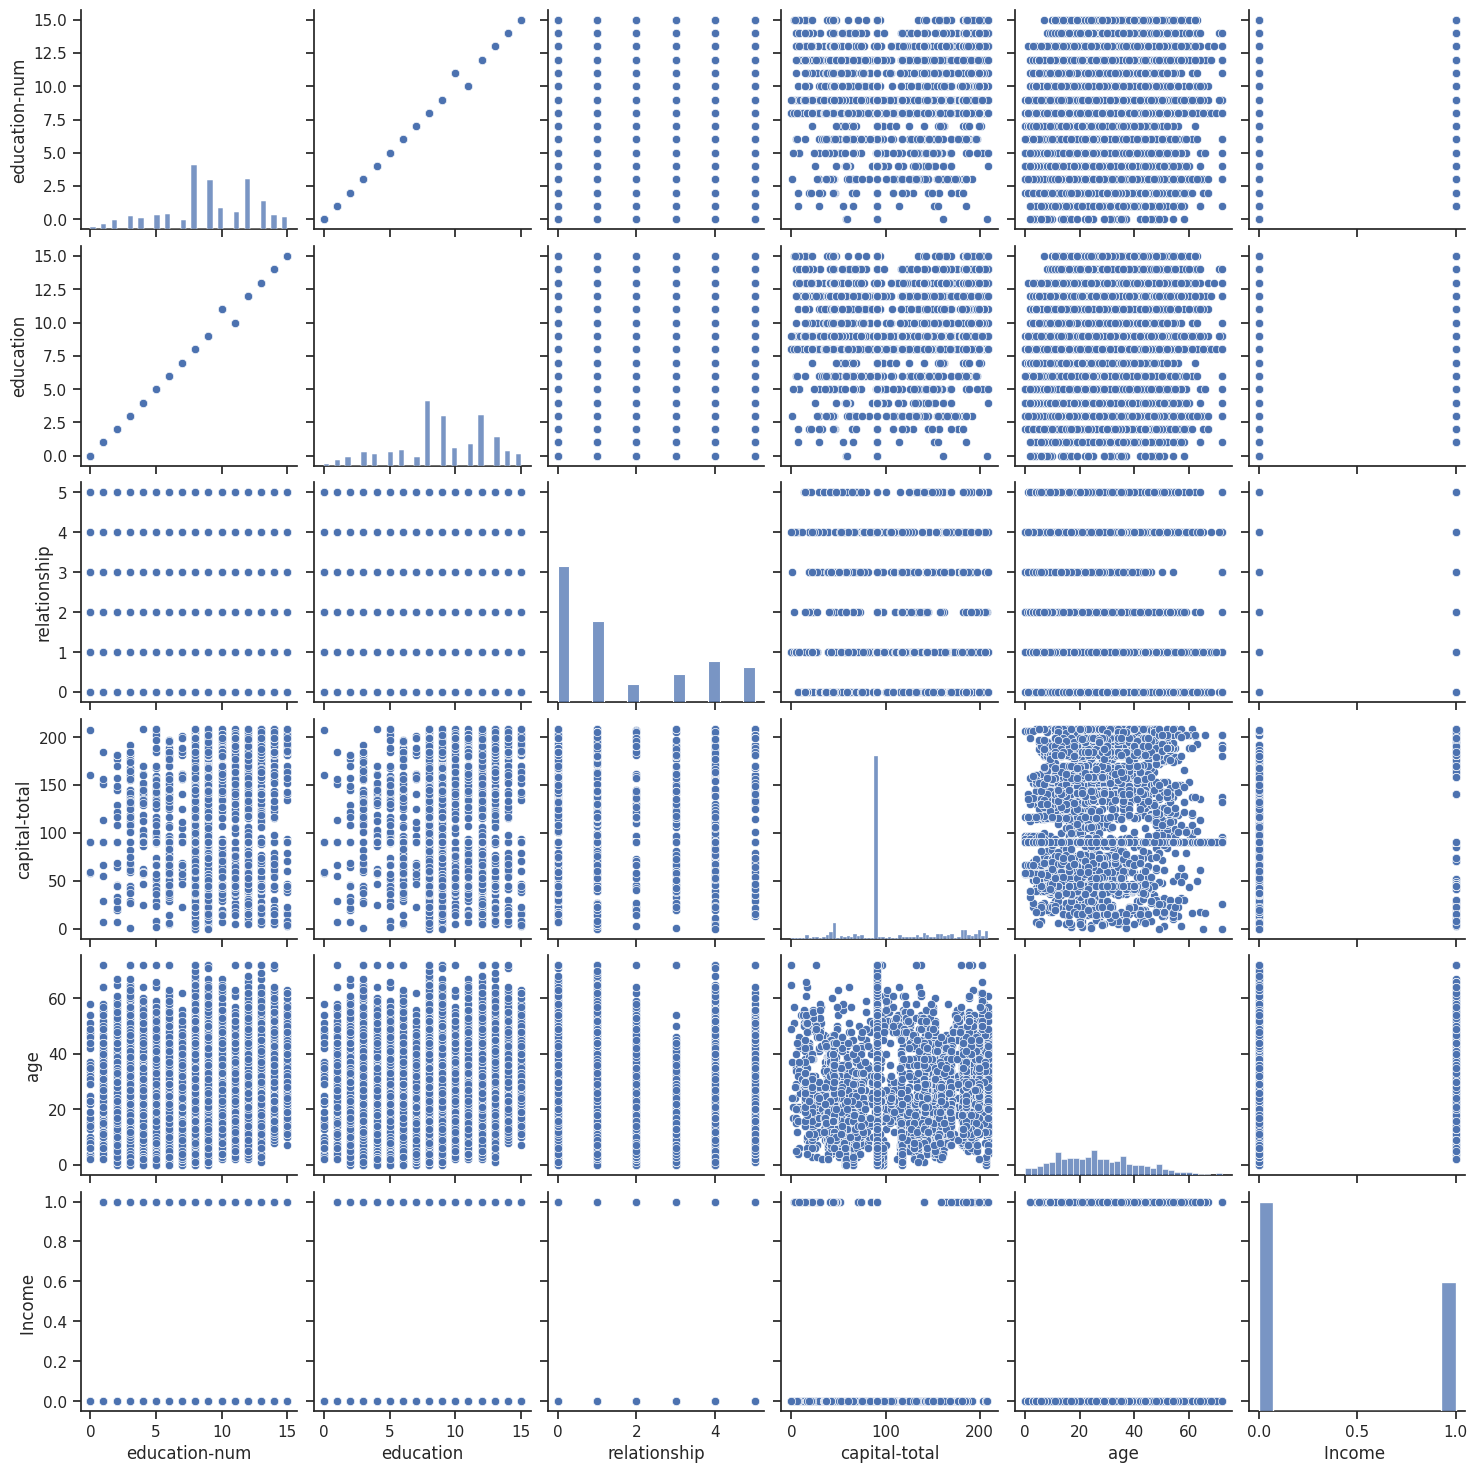

In [ ]:
# Compute correlation matrix
corr = data.corr()['Income '].abs().sort_values(ascending=False)

# Drop all features except the top 5
selected_features = corr.nlargest(6).index.tolist()[1:]
data_corr = data[selected_features + ['Income ']]

data_corr = data_corr.drop_duplicates()

sns.pairplot(data_corr)

Information Gain

In [ ]:
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to store the mutual information scores for each feature
features = pd.DataFrame({"feature": X.columns, "mutual_info": mutual_info})

# Sort the features by their mutual information scores in descending order
features = features.sort_values("mutual_info", ascending=False)

# Select the top 5 features based on their mutual information scores
ig_features = features.head(5)["feature"].values
ig_features=ig_features.tolist()
# Print the selected features
print(ig_features)

['marital-status', 'capital-total', 'education', 'relationship', 'education-num']


In [ ]:
# Drop all features except the top 5 and the target variable
data_ig = data[ig_features+ ["Income "]]

# Remove duplicate rows if necessary
data_ig = data_ig.drop_duplicates()

# Classification Models

**1-Correlation**

1-Logistic Regression

In [ ]:
train_X_corr = data_corr.drop('Income ', axis=1)
train_y_corr = data_corr['Income ']

logreg_corr.fit(train_X_corr, train_y_corr)

train_y_corr_pred_logreg = logreg_corr.predict(train_X_corr)
accuracy = accuracy_score(train_y_corr, train_y_corr_pred_logreg)
print("Accuracy:", accuracy)

Accuracy: 0.714911698313637


2-SVM

In [ ]:
svm_corr = SVC()
svm_corr.fit(train_X_corr, train_y_corr)
train_y_corr_pred_svm = svm_corr.predict(train_X_corr)
accuracy = accuracy_score(train_y_corr, train_y_corr_pred_svm )
print("Accuracy:", accuracy)


Accuracy: 0.7785154693931748


3- Decision Tree

In [ ]:
dt_corr = DecisionTreeClassifier()
dt_corr.fit(train_X_corr, train_y_corr)
train_y_corr_pred_dt = dt_corr.predict(train_X_corr)
accuracy = accuracy_score(train_y_corr, train_y_corr_pred_dt)
print("Accuracy:", accuracy)


Accuracy: 0.8803611738148984


In [ ]:
dt_corr_regul = DecisionTreeClassifier(ccp_alpha=0.01)  # set the ccp_alpha parameter to apply pruning
dt_corr_regul.fit(train_X_corr, train_y_corr)
train_y_corr_regul_pred_dt = dt_corr_regul.predict(train_X_corr)
accuracy = accuracy_score(train_y_corr, train_y_corr_regul_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7888726596733502


In [ ]:
from sklearn.model_selection import cross_val_score

#dt = DecisionTreeClassifier()
scores = cross_val_score(dt_corr, train_X_corr, train_y_corr, cv=5)
print("Accuracy without regularization: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#dt_regul = DecisionTreeClassifier(ccp_alpha=0.01)
scores = cross_val_score(dt_corr_regul, train_X_corr, train_y_corr, cv=5)
print("Accuracy with regularization: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy without regularization: 0.73 (+/- 0.19)
Accuracy with regularization: 0.79 (+/- 0.04)


**2-Ranked Features**

1-Logistic Regression

In [ ]:
train_X_rank = data_rank.drop('Income ', axis=1)
train_y_rank = data_rank['Income ']

logreg_rank.fit(train_X_rank, train_y_rank)

train_y_rank_pred_logreg = logreg_rank.predict(train_X_rank)
accuracy = accuracy_score(train_y_rank, train_y_rank_pred_logreg)
print("Accuracy:", accuracy)

Accuracy: 0.6953807740324595


2-SVM

In [ ]:
svm_rank = SVC()
svm_rank.fit(train_X_rank, train_y_rank)
train_y_rank_pred_svm = svm_rank.predict(train_X_rank)
accuracy = accuracy_score(train_y_rank, train_y_rank_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.6966292134831461


3-Decision Tree

In [ ]:
dt_rank = DecisionTreeClassifier()
dt_rank.fit(train_X_rank, train_y_rank)
train_y_rank_pred_dt = dt_rank.predict(train_X_rank)
accuracy = accuracy_score(train_y_rank, train_y_rank_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7228464419475655


In [ ]:
dt_rank_regul = DecisionTreeClassifier(ccp_alpha=0.01)  # set the ccp_alpha parameter to apply pruning
dt_rank_regul.fit(train_X_rank, train_y_rank)
train_y_rank_regul_pred_dt = dt_rank_regul.predict(train_X_rank)
accuracy = accuracy_score(train_y_rank, train_y_rank_regul_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.6966292134831461


**3-IG Features**

In [ ]:
#logreg_ig
train_X_ig = data_ig.drop('Income ', axis=1)
train_y_ig = data_ig['Income ']

1-Logistic Regression

In [ ]:
logreg_ig.fit(train_X_ig, train_y_ig)

train_y_ig_pred_logreg = logreg_ig.predict(train_X_ig)
accuracy = accuracy_score(train_y_ig, train_y_ig_pred_logreg)
print("Accuracy:", accuracy)

Accuracy: 0.7293086660175268


2-SVM

In [ ]:
svm_ig = SVC()
svm_ig.fit(train_X_ig, train_y_ig)
train_y_ig_pred_svm = svm_ig.predict(train_X_ig)
accuracy = accuracy_score(train_y_ig, train_y_ig_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.7775073028237586


3-Decision Tree

In [ ]:
dt_ig = DecisionTreeClassifier()
dt_ig.fit(train_X_ig, train_y_ig)
train_y_ig_pred_dt = dt_ig.predict(train_X_ig)
accuracy = accuracy_score(train_y_ig, train_y_ig_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.9221032132424537


In [ ]:
dt_ig_regul = DecisionTreeClassifier(ccp_alpha=0.01)  # set the ccp_alpha parameter to apply pruning
dt_ig_regul.fit(train_X_ig, train_y_ig)
train_y_ig_regul_pred_dt = dt_ig_regul.predict(train_X_ig)
accuracy = accuracy_score(train_y_ig, train_y_ig_regul_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7925998052580331


# Test Data: Preprocessing

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/نسخة من test_data.csv")

test_data['capital-total'] =test_data['capital-gain'] + (-1 * test_data['capital-loss'])
test_data = test_data.drop(['capital-gain', 'capital-loss'], axis=1)

test_data = test_data.drop_duplicates()


In [ ]:
print (test_data.isnull().sum()) 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
Income            0
capital-total     0
dtype: int64


In [ ]:
unique_values = {}
for column in test_data:
    unique_values[column] = test_data[column].unique()

print(unique_values)

{'age': array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87]), 'workclass': array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object), 'fnlwgt': array([226802,  89814, 336951, ..., 349230, 321403,  83891]), 'education': array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object), 'education-num': array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1]), 'marital-status': array([' Never-married', ' Married-civ-spous

In [ ]:
workclass_mode = test_data['workclass'].mode()[0]
test_data['workclass'] = test_data['workclass'].replace(' ?', workclass_mode)

occupation_mode = test_data['occupation'].mode()[0]
test_data['occupation'] = test_data['occupation'].replace(' ?', occupation_mode)

native_country_mode = test_data['native-country'].mode()[0]
test_data['native-country'] = test_data['native-country'].replace(' ?', native_country_mode)

<ipython-input-285-9febe62ae9aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['workclass'] = test_data['workclass'].replace(' ?', workclass_mode)
<ipython-input-285-9febe62ae9aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['occupation'] = test_data['occupation'].replace(' ?', occupation_mode)
<ipython-input-285-9febe62ae9aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
test_data['education'] = test_data['education'].replace(' Preschool', 0)
test_data['education'] = test_data['education'].replace(' 1st-4th', 1)
test_data['education'] = test_data['education'].replace(' 5th-6th', 2)
test_data['education'] = test_data['education'].replace(' 7th-8th', 3)
test_data['education'] = test_data['education'].replace(' 9th', 4)
test_data['education'] = test_data['education'].replace(' 10th', 5)
test_data['education'] = test_data['education'].replace(' 11th', 6)   
test_data['education'] = test_data['education'].replace(' 12th', 7)
test_data['education'] = test_data['education'].replace(' HS-grad', 8)
test_data['education'] = test_data['education'].replace(' Some-college', 9)
test_data['education'] = test_data['education'].replace(' Assoc-acdm', 10)
test_data['education'] = test_data['education'].replace(' Assoc-voc', 11)
test_data['education'] = test_data['education'].replace(' Bachelors', 12)
test_data['education'] = test_data['education'].replace(' Masters', 13)
test_data['education'] = test_data['education'].replace(' Prof-school', 14)
test_data['education'] = test_data['education'].replace(' Doctorate', 15)

<ipython-input-286-0ccca1d05cf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['education'] = test_data['education'].replace(' Preschool', 0)
<ipython-input-286-0ccca1d05cf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['education'] = test_data['education'].replace(' 1st-4th', 1)
<ipython-input-286-0ccca1d05cf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
test_data = test_data.apply(LabelEncoder().fit_transform)

In [ ]:
# test_data['workclass'] = test_data['workclass'].replace(" State-gov", 0)
# test_data['workclass'] = test_data['workclass'].replace(" Self-emp-not-inc", 1)
# test_data['workclass'] = test_data['workclass'].replace(" Private", 2)
# test_data['workclass'] = test_data['workclass'].replace(" Federal-gov", 3)
# test_data['workclass'] = test_data['workclass'].replace(" Local-gov", 4)
# test_data['workclass'] = test_data['workclass'].replace(" Self-emp-inc", 5)
# test_data['workclass'] = test_data['workclass'].replace(" Without-pay", 6)
# test_data['workclass'] = test_data['workclass'].replace(" Never-worked", 7)

# test_data['education'] = test_data['education'].replace(' Bachelors', 0)
# test_data['education'] = test_data['education'].replace(' HS-grad', 1)
# test_data['education'] = test_data['education'].replace(' 11th', 2)
# test_data['education'] = test_data['education'].replace(' Masters', 3)
# test_data['education'] = test_data['education'].replace(' 9th', 4)
# test_data['education'] = test_data['education'].replace(' Some-college', 5)
# test_data['education'] = test_data['education'].replace(' Assoc-acdm', 6)
# test_data['education'] = test_data['education'].replace(' Assoc-voc', 7)
# test_data['education'] = test_data['education'].replace(' 7th-8th', 8)
# test_data['education'] = test_data['education'].replace(' Doctorate', 9)
# test_data['education'] = test_data['education'].replace(' Prof-school', 10)
# test_data['education'] = test_data['education'].replace(' 5th-6th', 11)
# test_data['education'] = test_data['education'].replace(' 10th', 12)
# test_data['education'] = test_data['education'].replace(' 1st-4th', 13)
# test_data['education'] = test_data['education'].replace(' Preschool', 14)
# test_data['education'] = test_data['education'].replace(' 12th', 15)

# test_data['marital-status'] = test_data['marital-status'].replace(' Never-married', 0)
# test_data['marital-status'] = test_data['marital-status'].replace(' Married-civ-spouse', 1)
# test_data['marital-status'] = test_data['marital-status'].replace(' Divorced', 2)
# test_data['marital-status'] = test_data['marital-status'].replace(' Married-spouse-absent', 3)
# test_data['marital-status'] = test_data['marital-status'].replace(' Separated', 4)
# test_data['marital-status'] = test_data['marital-status'].replace(' Married-AF-spouse', 5)
# test_data['marital-status'] = test_data['marital-status'].replace(' Widowed', 6)

# test_data['occupation'] = test_data['occupation'].replace(' Adm-clerical', 0)
# test_data['occupation'] = test_data['occupation'].replace(' Exec-managerial', 1)
# test_data['occupation'] = test_data['occupation'].replace(' Handlers-cleaners', 2)
# test_data['occupation'] = test_data['occupation'].replace(' Prof-specialty', 3)
# test_data['occupation'] = test_data['occupation'].replace(' Other-service', 4)
# test_data['occupation'] = test_data['occupation'].replace(' Sales', 5)
# test_data['occupation'] = test_data['occupation'].replace(' Craft-repair', 6)
# test_data['occupation'] = test_data['occupation'].replace(' Transport-moving', 7)
# test_data['occupation'] = test_data['occupation'].replace(' Farming-fishing', 8)
# test_data['occupation'] = test_data['occupation'].replace(' Machine-op-inspct', 9)
# test_data['occupation'] = test_data['occupation'].replace(' Tech-support', 10)
# test_data['occupation'] = test_data['occupation'].replace(' Protective-serv', 11)
# test_data['occupation'] = test_data['occupation'].replace(' Armed-Forces', 12)
# test_data['occupation'] = test_data['occupation'].replace(' Priv-house-serv', 13)

# test_data['relationship'] = test_data['relationship'].replace(' Not-in-family', 0)
# test_data['relationship'] = test_data['relationship'].replace(' Husband', 1)
# test_data['relationship'] = test_data['relationship'].replace(' Wife', 2)
# test_data['relationship'] = test_data['relationship'].replace(' Own-child', 3)
# test_data['relationship'] = test_data['relationship'].replace(' Unmarried', 4)
# test_data['relationship'] = test_data['relationship'].replace(' Other-relative', 5)

# test_data['race'] = test_data['race'].replace(' White', 0)
# test_data['race'] = test_data['race'].replace(' Black', 1)
# test_data['race'] = test_data['race'].replace(' Asian-Pac-Islander', 2)
# test_data['race'] = test_data['race'].replace(' Amer-Indian-Eskimo', 3)
# test_data['race'] = test_data['race'].replace(' Other', 4)

# test_data['sex'] = test_data['sex'].replace(' Male', 0)
# test_data['sex'] = test_data['sex'].replace(' Female', 1)

# test_data['native-country'] = test_data['native-country'].replace(' United-States', 0)
# test_data['native-country'] = test_data['native-country'].replace(' Cambodia', 1)
# test_data['native-country'] = test_data['native-country'].replace(' England', 2)
# test_data['native-country'] = test_data['native-country'].replace(' Puerto-Rico', 3)
# test_data['native-country'] = test_data['native-country'].replace(' Canada', 4)
# test_data['native-country'] = test_data['native-country'].replace(' Germany', 5)
# test_data['native-country'] = test_data['native-country'].replace(' Outlying-US(Guam-USVI-etc)', 6)
# test_data['native-country'] = test_data['native-country'].replace(' India', 7)
# test_data['native-country'] = test_data['native-country'].replace(' Japan', 8)
# test_data['native-country'] = test_data['native-country'].replace(' Greece', 9)
# test_data['native-country'] = test_data['native-country'].replace(' South', 10)
# test_data['native-country'] = test_data['native-country'].replace(' China', 11)
# test_data['native-country'] = test_data['native-country'].replace(' Cuba', 12)
# test_data['native-country'] = test_data['native-country'].replace(' Iran', 13)
# test_data['native-country'] = test_data['native-country'].replace(' Honduras', 14)
# test_data['native-country'] = test_data['native-country'].replace(' Philippines', 15)
# test_data['native-country'] = test_data['native-country'].replace(' Italy', 16)
# test_data['native-country'] = test_data['native-country'].replace(' Poland', 17)
# test_data['native-country'] = test_data['native-country'].replace(' Jamaica', 18)
# test_data['native-country'] = test_data['native-country'].replace(' Vietnam', 19)
# test_data['native-country'] = test_data['native-country'].replace(' Mexico', 20)
# test_data['native-country'] = test_data['native-country'].replace(' Portugal', 21)
# test_data['native-country'] = test_data['native-country'].replace(' Ireland', 22)
# test_data['native-country'] = test_data['native-country'].replace(' France', 23)
# test_data['native-country'] = test_data['native-country'].replace(' Dominican-Republic', 24)
# test_data['native-country'] = test_data['native-country'].replace(' Laos', 25)
# test_data['native-country'] = test_data['native-country'].replace(' Ecuador', 26)
# test_data['native-country'] = test_data['native-country'].replace(' Taiwan', 27)
# test_data['native-country'] = test_data['native-country'].replace(' Haiti', 28)
# test_data['native-country'] = test_data['native-country'].replace(' Columbia', 29)
# test_data['native-country'] = test_data['native-country'].replace(' Hungary', 30)
# test_data['native-country'] = test_data['native-country'].replace(' Guatemala', 31)
# test_data['native-country'] = test_data['native-country'].replace(' Nicaragua', 32)
# test_data['native-country'] = test_data['native-country'].replace(' Scotland', 33)
# test_data['native-country'] = test_data['native-country'].replace(' Thailand', 34)
# test_data['native-country'] = test_data['native-country'].replace(' Yugoslavia', 35)
# test_data['native-country'] = test_data['native-country'].replace(' El-Salvador', 36)
# test_data['native-country'] = test_data['native-country'].replace(' Trinadad&Tobago', 37)
# test_data['native-country'] = test_data['native-country'].replace(' Peru', 38)
# test_data['native-country'] = test_data['native-country'].replace(' Hong', 39)
# test_data['native-country'] = test_data['native-country'].replace(' Holand-Netherlands', 40)

# test_data['Income '] = test_data['Income '].replace(' <=50K.', 0)
# test_data['Income '] = test_data['Income '].replace(' >50K.', 1)

In [ ]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income,capital-total
0,8,3,8931,6,6,4,6,3,2,1,39,37,0,81
1,21,3,1888,8,8,2,4,0,4,1,49,37,0,81
2,11,1,11540,10,11,2,10,0,4,1,39,37,1,81
3,27,3,5146,9,9,2,6,0,2,1,39,37,1,171
4,1,3,2450,9,9,4,9,3,4,0,29,37,0,81


# Test Data: Classification Models 

**Correlation**

In [ ]:
test_data_corr = test_data[selected_features + ['Income ']]

test_data_corr = test_data_corr.drop_duplicates()

1-Logistic regression

In [ ]:
test_X_corr = test_data_corr.drop('Income ', axis=1)
test_y_corr = test_data_corr['Income ']

test_y_corr_pred_logreg = logreg_corr.predict(test_X_corr)
accuracy = accuracy_score(test_y_corr, test_y_corr_pred_logreg)
print("Accuracy:", accuracy)

Accuracy: 0.7254623044096729


2-svm

In [ ]:
test_y_corr_pred_svm  = svm_corr.predict(test_X_corr)
accuracy = accuracy_score(test_y_corr, test_y_corr_pred_svm )
print("Accuracy:", accuracy)

Accuracy: 0.7516764885185938


3- Decision tree

In [ ]:

test_y_corr_pred_dt = dt_corr.predict(test_X_corr)
accuracy = accuracy_score(test_y_corr, test_y_corr_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.706766917293233


In [ ]:

test_y_corr_regul_pred_dt = dt_corr_regul.predict(test_X_corr)
accuracy = accuracy_score(test_y_corr, test_y_corr_regul_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.6878683194472668


**Rank**

In [ ]:
test_data_rank = test_data[top_features + ['Income ']]

test_data_rank = test_data_rank.drop_duplicates()

1-Logistic regression

In [ ]:
test_X_rank = test_data_rank.drop('Income ', axis=1)
test_y_rank = test_data_rank['Income ']

test_y_rank_pred_logreg = logreg_rank.predict(test_X_rank)
accuracy = accuracy_score(test_y_rank, test_y_rank_pred_logreg)
print("Accuracy:", accuracy)

Accuracy: 0.7434715821812596


2-SVM

In [ ]:
test_y_rank_pred_svm = svm_rank.predict(test_X_rank)
accuracy = accuracy_score(test_y_rank, test_y_rank_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.7480798771121352


3-Decision Tree

In [ ]:
test_y_rank_pred_dt = dt_rank.predict(test_X_rank)
accuracy = accuracy_score(test_y_rank, test_y_rank_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7434715821812596


In [ ]:
test_y_rank_regul_pred_dt = dt_rank_regul.predict(test_X_rank)
accuracy = accuracy_score(test_y_rank, test_y_rank_regul_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7480798771121352


**IG**

In [ ]:
test_data_ig = test_data[ig_features + ['Income ']]
test_data_ig = test_data_ig.drop_duplicates()


test_X_ig = test_data_ig.drop('Income ', axis=1)
test_y_ig = test_data_ig['Income ']

1-Logistic regression

In [ ]:
test_y_ig_pred_logreg = logreg_ig.predict(test_X_ig)
accuracy = accuracy_score(test_y_ig, test_y_ig_pred_logreg)
print("Accuracy:", accuracy)

Accuracy: 0.7262853005068791


2-SVM

In [ ]:
test_y_ig_pred_svm = svm_ig.predict(test_X_ig)
accuracy = accuracy_score(test_y_ig, test_y_ig_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.7530774800868936


3-Decision Tree

In [ ]:
test_y_ig_pred_dt = dt_ig.predict(test_X_ig)
accuracy = accuracy_score(test_y_ig, test_y_ig_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7154236060825488


In [ ]:
test_y_ig_regul_pred_dt = dt_ig_regul.predict(test_X_ig)
accuracy = accuracy_score(test_y_ig, test_y_ig_regul_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.722664735698769


# Model Evaluation

**Correlation**

1-Logistic regression

2-SVM

3-Decision Tree

In [ ]:
models = {
    'Logistic Regression': (train_y_corr_pred_logreg, test_y_corr_pred_logreg),
    'Support Vector Machine': (train_y_corr_pred_svm, test_y_corr_pred_svm),
    'Decision Tree': (train_y_corr_pred_dt, test_y_corr_pred_dt),
    'Regularized Decision Tree': (train_y_corr_regul_pred_dt, test_y_corr_regul_pred_dt)
}

for model_name, (train_pred, test_pred) in models.items():
    print(f'{model_name} - Train Data:')
    print(f'Accuracy: {metrics.accuracy_score(train_y_corr, train_pred)}')
    print(f'Precision: {metrics.precision_score(train_y_corr, train_pred)}')
    print(f'Recall: {metrics.recall_score(train_y_corr, train_pred)}')
    print(f'F1-score: {metrics.f1_score(train_y_corr, train_pred)}')
    print(f'Confusion Matrix:\n{metrics.confusion_matrix(train_y_corr, train_pred)}\n')
    print('-' * 25)
    print(f'{model_name} - Test Data:')
    print(f'Accuracy: {metrics.accuracy_score(test_y_corr, test_pred)}')
    print(f'Precision: {metrics.precision_score(test_y_corr, test_pred)}')
    print(f'Recall: {metrics.recall_score(test_y_corr, test_pred)}')
    print(f'F1-score: {metrics.f1_score(test_y_corr, test_pred)}')
    print(f'Confusion Matrix:\n{metrics.confusion_matrix(test_y_corr, test_pred)}\n')
    print('=' * 50)

Logistic Regression - Train Data:
Accuracy: 0.714911698313637
Precision: 0.6657633242999097
Recall: 0.5116279069767442
F1-score: 0.5786064769381747
Confusion Matrix:
[[3910  740]
 [1407 1474]]

-------------------------
Logistic Regression - Test Data:
Accuracy: 0.7254623044096729
Precision: 0.6688796680497925
Recall: 0.45847554038680316
F1-score: 0.5440431994600067
Confusion Matrix:
[[2764  399]
 [ 952  806]]

Support Vector Machine - Train Data:
Accuracy: 0.7785154693931748
Precision: 0.8487636572742956
Recall: 0.5123221103783409
F1-score: 0.638961038961039
Confusion Matrix:
[[4387  263]
 [1405 1476]]

-------------------------
Support Vector Machine - Test Data:
Accuracy: 0.7516764885185938
Precision: 0.8228915662650602
Recall: 0.38850967007963594
F1-score: 0.5278207109737248
Confusion Matrix:
[[3016  147]
 [1075  683]]

Decision Tree - Train Data:
Accuracy: 0.8803611738148984
Precision: 1.0
Recall: 0.6872613675807011
F1-score: 0.8146471919358157
Confusion Matrix:
[[4650    0]
 [ 90

**Rank**

1-Logistic regression

2_SVM

3-Decision Tree

In [ ]:
models = {
    'Logistic Regression': (train_y_rank_pred_logreg, test_y_rank_pred_logreg),
    'Support Vector Machine': (train_y_rank_pred_svm, test_y_rank_pred_svm),
    'Decision Tree': (train_y_rank_pred_dt, test_y_rank_pred_dt),
    'Regularized Decision Tree': (train_y_rank_regul_pred_dt, test_y_rank_regul_pred_dt)
}

for model_name, (train_pred, test_pred) in models.items():
    print(f'{model_name} - Train Data:')
    print(f'Accuracy: {metrics.accuracy_score(train_y_rank, train_pred)}')
    print(f'Precision: {metrics.precision_score(train_y_rank, train_pred, zero_division=1)}')
    print(f'Recall: {metrics.recall_score(train_y_rank, train_pred)}')
    print(f'F1-score: {metrics.f1_score(train_y_rank, train_pred)}')
    print(f'Confusion Matrix:\n{metrics.confusion_matrix(train_y_rank, train_pred)}\n')
    print('-' * 25)
    print(f'{model_name} - Test Data:')
    print(f'Accuracy: {metrics.accuracy_score(test_y_rank, test_pred)}')
    print(f'Precision: {metrics.precision_score(test_y_rank, test_pred, zero_division=1)}')
    print(f'Recall: {metrics.recall_score(test_y_rank, test_pred)}')
    print(f'F1-score: {metrics.f1_score(test_y_rank, test_pred)}')
    print(f'Confusion Matrix:\n{metrics.confusion_matrix(test_y_rank, test_pred)}\n')
    print('=' * 50)

Logistic Regression - Train Data:
Accuracy: 0.6953807740324595
Precision: 0.49382716049382713
Recall: 0.1646090534979424
F1-score: 0.24691358024691357
Confusion Matrix:
[[517  41]
 [203  40]]

-------------------------
Logistic Regression - Test Data:
Accuracy: 0.7434715821812596
Precision: 0.47368421052631576
Recall: 0.16463414634146342
F1-score: 0.24434389140271492
Confusion Matrix:
[[457  30]
 [137  27]]

Support Vector Machine - Train Data:
Accuracy: 0.6966292134831461
Precision: 1.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[558   0]
 [243   0]]

-------------------------
Support Vector Machine - Test Data:
Accuracy: 0.7480798771121352
Precision: 1.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[487   0]
 [164   0]]

Decision Tree - Train Data:
Accuracy: 0.7228464419475655
Precision: 1.0
Recall: 0.08641975308641975
F1-score: 0.1590909090909091
Confusion Matrix:
[[558   0]
 [222  21]]

-------------------------
Decision Tree - Test Data:
Accuracy: 0.7434715821812596
Precision: 0

**IG**

1-Logistic regression

2_SVM

3-Decision Tree

In [ ]:
models = {
    'Logistic Regression': (train_y_ig_pred_logreg, test_y_ig_pred_logreg),
    'Support Vector Machine': (train_y_ig_pred_svm, test_y_ig_pred_svm),
    'Decision Tree': (train_y_ig_pred_dt, test_y_ig_pred_dt),
    'Regularized Decision Tree': (train_y_ig_regul_pred_dt, test_y_ig_regul_pred_dt)
}

for model_name, (train_pred, test_pred) in models.items():
    print(f'{model_name} - Train Data:')
    print(f'Accuracy: {metrics.accuracy_score(train_y_ig, train_pred)}')
    print(f'Precision: {metrics.precision_score(train_y_ig, train_pred, zero_division=1)}')
    print(f'Recall: {metrics.recall_score(train_y_ig, train_pred)}')
    print(f'F1-score: {metrics.f1_score(train_y_ig, train_pred)}')
    print(f'Confusion Matrix:\n{metrics.confusion_matrix(train_y_ig, train_pred)}\n')
    print('-' * 25)
    print(f'{model_name} - Test Data:')
    print(f'Accuracy: {metrics.accuracy_score(test_y_ig, test_pred)}')
    print(f'Precision: {metrics.precision_score(test_y_ig, test_pred, zero_division=1)}')
    print(f'Recall: {metrics.recall_score(test_y_ig, test_pred)}')
    print(f'F1-score: {metrics.f1_score(test_y_ig, test_pred)}')
    print(f'Confusion Matrix:\n{metrics.confusion_matrix(test_y_ig, test_pred)}\n')
    print('=' * 50)

Logistic Regression - Train Data:
Accuracy: 0.7293086660175268
Precision: 0.6621983914209115
Recall: 0.36484490398818314
F1-score: 0.4704761904761905
Confusion Matrix:
[[1251  126]
 [ 430  247]]

-------------------------
Logistic Regression - Test Data:
Accuracy: 0.7262853005068791
Precision: 0.7075471698113207
Recall: 0.3218884120171674
F1-score: 0.44247787610619466
Confusion Matrix:
[[853  62]
 [316 150]]

Support Vector Machine - Train Data:
Accuracy: 0.7775073028237586
Precision: 0.8333333333333334
Recall: 0.40620384047267355
F1-score: 0.5461767626613705
Confusion Matrix:
[[1322   55]
 [ 402  275]]

-------------------------
Support Vector Machine - Test Data:
Accuracy: 0.7530774800868936
Precision: 0.9699248120300752
Recall: 0.27682403433476394
F1-score: 0.4307178631051753
Confusion Matrix:
[[911   4]
 [337 129]]

Decision Tree - Train Data:
Accuracy: 0.9221032132424537
Precision: 1.0
Recall: 0.7636632200886263
F1-score: 0.8659966499162479
Confusion Matrix:
[[1377    0]
 [ 160  5

so, correlated SVM is the best model.
